In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sample sentences
sentences = [
    "Charles Leclerc lost his father",
    "he told his father a white lie",
    "his driving has made it true now"
]

#One-Hot Encoding
processed_sentences = [sentence.lower().split() for sentence in sentences]
vocab = sorted({word for sentence in processed_sentences for word in sentence})

one_hot_vectors = []
for sentence in processed_sentences:
    vector = [0] * len(vocab)
    for word in sentence:
        vector[vocab.index(word)] = 1
    one_hot_vectors.append(vector)

print("Vocabulary:\n", vocab)
print("\nOne-Hot Encoded Vectors:")
for i, vec in enumerate(one_hot_vectors):
    print(f"Sentence {i+1}: {vec}")



Vocabulary:
 ['a', 'charles', 'driving', 'father', 'has', 'he', 'his', 'it', 'leclerc', 'lie', 'lost', 'made', 'now', 'told', 'true', 'white']

One-Hot Encoded Vectors:
Sentence 1: [0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
Sentence 2: [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]
Sentence 3: [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0]



TF-IDF Scores for: ' Charles Leclerc lost his father '
charles: 0.2197
his: 0.0000
leclerc: 0.2197
father: 0.0811
lost: 0.2197


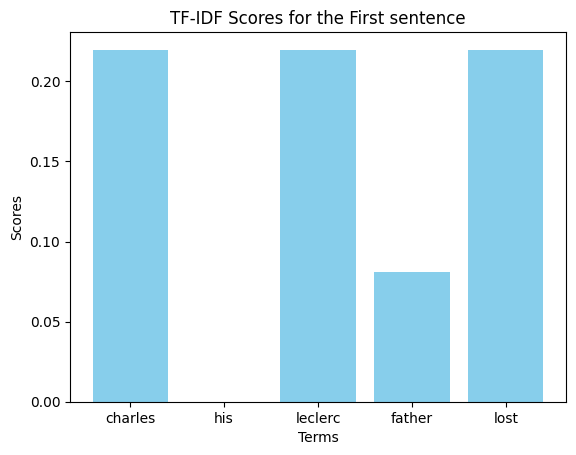

In [12]:
#TF-IDF
sample_doc = processed_sentences[0]
n_docs = len(processed_sentences)

#(TF)
tf = {term: sample_doc.count(term)/len(sample_doc) for term in sample_doc}

#(IDF)
idf = {}
terms_in_doc = set(sample_doc)
for term in terms_in_doc:
    df = sum(1 for doc in processed_sentences if term in doc)
    idf[term] = np.log(n_docs / df)

# TF-IDF
tfidf = {term: tf[term] * idf[term] for term in terms_in_doc}

print("\nTF-IDF Scores for: '", sentences[0],"'")
for term, score in tfidf.items():
    print(f"{term}: {score:.4f}")

# visualization
plt.bar(tfidf.keys(), tfidf.values(), color='skyblue')
plt.title('TF-IDF Scores for the First sentence')
plt.xlabel('Terms')
plt.ylabel('Scores')
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
sentences = [
    "There are many applications such as analyzing customer reviews",
    "Before performing sentiment analysis, it is essential to preprocess the text data",
    "The goal is to capture the meaning of terms within the document"
]

processed_sentences = [sentence.lower().split() for sentence in sentences]

In [26]:
# 1. Train CBOW and Skip-gram models
cbow_model = Word2Vec(processed_sentences, vector_size=50, window=3, min_count=1, sg=0)  # CBOW
skipgram_model = Word2Vec(processed_sentences, vector_size=50, window=3, min_count=1, sg=1)  # Skip-gram


In [28]:
words = ["before", "capture", "sentiment"]
print("Cosine Similarity Comparison:")
for word in words:
    # Get vectors
    cbow_vec = cbow_model.wv[word].reshape(1, -1)
    skipgram_vec = skipgram_model.wv[word].reshape(1, -1)
    
    # Compute similarity
    sim = cosine_similarity(cbow_vec, skipgram_vec)[0][0]
    print(f"'{word}': CBOW vs. Skip-gram similarity = {sim:.4f}")

Cosine Similarity Comparison:
'before': CBOW vs. Skip-gram similarity = 1.0000
'capture': CBOW vs. Skip-gram similarity = 1.0000
'sentiment': CBOW vs. Skip-gram similarity = 1.0000


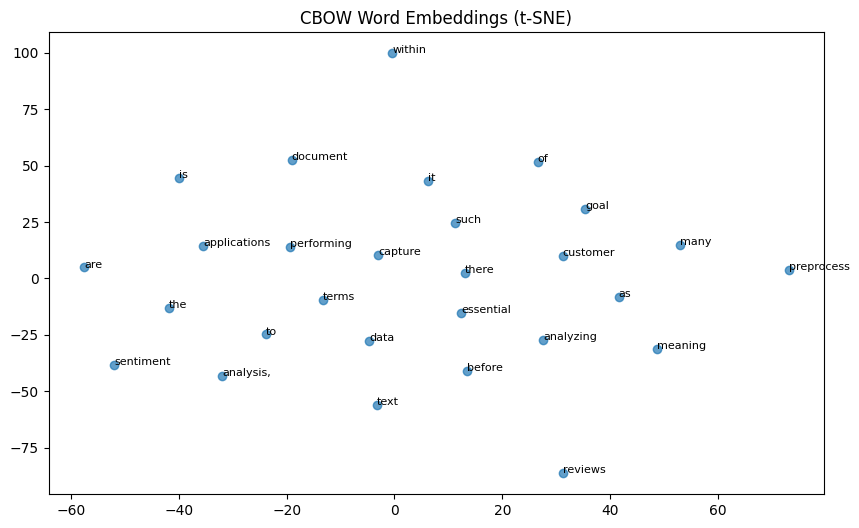

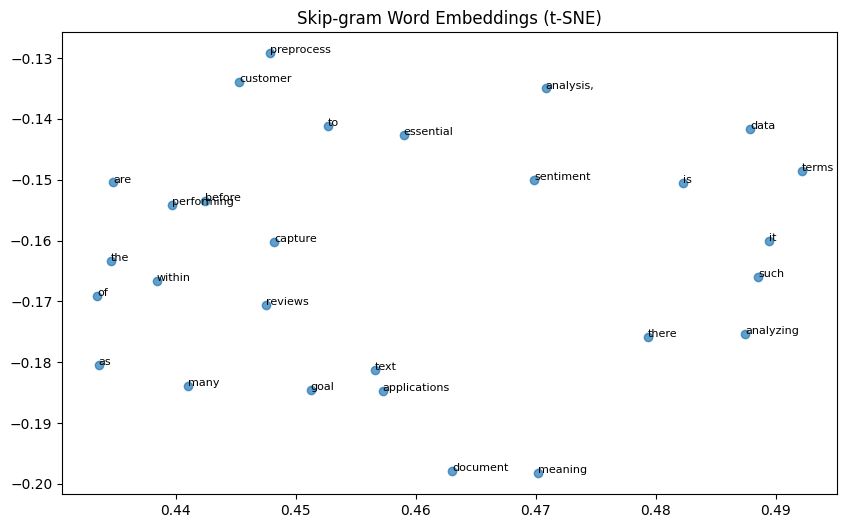

In [29]:
# 3. Visualize with t-SNE
def plot_embeddings(model, title):
    words = list(model.wv.key_to_index.keys())
    vectors = np.array([model.wv[word] for word in words])  # Convert to NumPy array
    
    # Reduce to 2D with t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(vectors)-1))  # Adjust perplexity
    vectors_2d = tsne.fit_transform(vectors)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.7)
    for i, word in enumerate(words):
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=8)
    plt.title(title)
    plt.show()

plot_embeddings(cbow_model, "CBOW Word Embeddings (t-SNE)")
plot_embeddings(skipgram_model, "Skip-gram Word Embeddings (t-SNE)")

C:\Users\kaira\AppData\Local\Temp\ipykernel_33076\872641569.py:11: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


Words similar to 'king':
prince: 0.8236
queen: 0.7839
ii: 0.7746
emperor: 0.7736
son: 0.7667


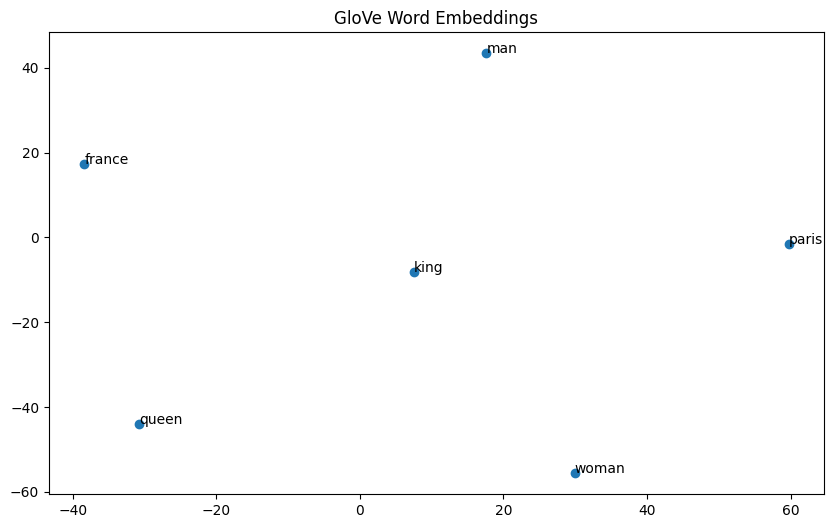

In [33]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Download GloVe embeddings first (e.g., glove.6B.50d.txt) from https://nlp.stanford.edu/projects/glove/
# Then convert to word2vec format
glove_input_file = 'glove.6B.50d.txt'
word2vec_output_file = 'glove.6B.50d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

# Load the converted model
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Find similar words
word = "king"
print(f"Words similar to '{word}':")
for similar_word, similarity in glove_model.most_similar(word, topn=5):
    print(f"{similar_word}: {similarity:.4f}")

# Visualize embeddings
def plot_embeddings(model, words, title):
    # Filter words that exist in the model's vocabulary
    valid_words = [word for word in words if word in model]
    if not valid_words:
        print(f"No valid words found in model for: {words}")
        return
    
    vectors = np.array([model[word] for word in valid_words])
    
    # Adjust perplexity based on number of samples
    n_samples = len(valid_words)
    perplexity = min(30, n_samples - 1)  # Perplexity must be < n_samples
    
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    vectors_2d = tsne.fit_transform(vectors)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
    for i, word in enumerate(valid_words):
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))
    plt.title(title)
    plt.show()

# Example usage:
words_to_plot = ['king', 'queen', 'man', 'woman', 'paris', 'france']
plot_embeddings(glove_model, words_to_plot, "GloVe Word Embeddings")

In [34]:
from gensim.models import FastText
from gensim.models import Word2Vec

# Sample sentences
sentences = [
    ["king", "queen", "royalty"],
    ["man", "woman", "person"],
    ["france", "paris", "berlin"],
    ["computer", "keyboard", "mouse"]
]

# Train FastText model
fasttext_model = FastText(sentences, vector_size=50, window=5, min_count=1, workers=4, sg=1)

# Train Word2Vec model for comparison
word2vec_model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4, sg=1)

# Compare embeddings for a word
word = "king"
print("\nFastText vs Word2Vec similarities for 'king':")
print("FastText similar words:")
for similar_word, similarity in fasttext_model.wv.most_similar(word, topn=3):
    print(f"{similar_word}: {similarity:.4f}")

print("\nWord2Vec similar words:")
for similar_word, similarity in word2vec_model.wv.most_similar(word, topn=3):
    print(f"{similar_word}: {similarity:.4f}")

# Compare out-of-vocabulary handling
oov_word = "kingdom"
print("\nOut-of-vocabulary word test:")
print(f"FastText vector for '{oov_word}': {fasttext_model.wv[oov_word].shape}")  # Works due to subword info
try:
    print(f"Word2Vec vector for '{oov_word}': {word2vec_model.wv[oov_word].shape}")  # Fails
except KeyError:
    print(f"Word2Vec: '{oov_word}' not in vocabulary")


FastText vs Word2Vec similarities for 'king':
FastText similar words:
person: 0.1639
mouse: 0.1592
royalty: 0.1326

Word2Vec similar words:
france: 0.1978
mouse: 0.1670
computer: 0.1552

Out-of-vocabulary word test:
FastText vector for 'kingdom': (50,)
Word2Vec: 'kingdom' not in vocabulary
